<a href="https://colab.research.google.com/github/aadi-29/machinelearning/blob/main/ML14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
df=pd. read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
d=df.drop(columns=['Species'])

In [ ]:
from sklearn.preprocessing import StandardScaler
d=StandardScaler().fit_transform(d)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,-2.816339,0.506051
1,-2.645527,-0.651799
2,-2.879481,-0.321036
3,-2.810934,-0.577363
4,-2.879884,0.670468
...,...,...
145,2.424421,0.377119
146,2.164220,-0.915696
147,2.139796,0.254272
148,2.029480,0.998725


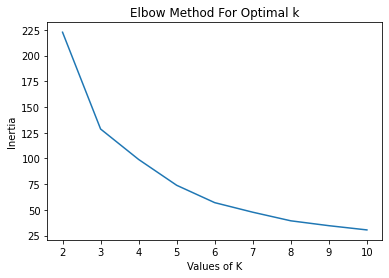

In [ ]:
inertia_avg = []
K = range(2,11)
for i in K :
    inertia=[]
    for j in range(10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(principalDf)
        inertia.append(kmeans.inertia_)
    avg_inertia=sum(inertia)/len(inertia)
    inertia_avg.append(avg_inertia)
plt.plot(K,inertia_avg)
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

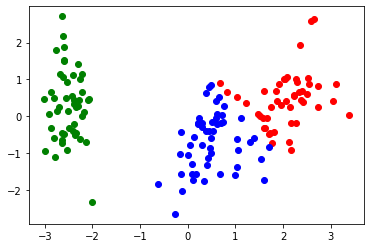

In [ ]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(principalComponents)
#print(label)

filtered_l0=principalComponents[label==0]
filtered_l1=principalComponents[label==1]
filtered_l2=principalComponents[label==2]

plt.scatter(filtered_l0[:,0],filtered_l0[:,1],color="red")
plt.scatter(filtered_l1[:,0],filtered_l1[:,1],color="green")
plt.scatter(filtered_l2[:,0],filtered_l2[:,1],color="blue")
plt.show()

In [ ]:
K = range(2,5)
for i in K :
    gmm = GaussianMixture(n_components=i)
    gmm.fit(principalDf)


In [ ]:
n_components = np.arange(2, 5)
models = [GaussianMixture(n,covariance_type='full', random_state=0).fit(principalDf) for n in n_components]
models[0:3]
 

[GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0)]

Text(0, 0.5, 'AIC / BIC')

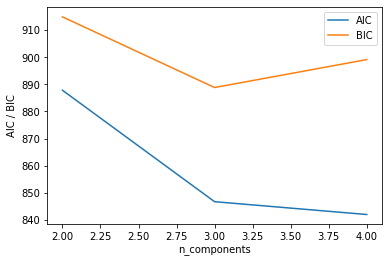

In [ ]:
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    clf = GaussianMixture(n_components=n,
              covariance_type='diag')
    clf.fit(principalDf)

    AIC[i] = clf.aic(principalDf)
    BIC[i] = clf.bic(principalDf)

plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components')
plt.ylabel('AIC / BIC')


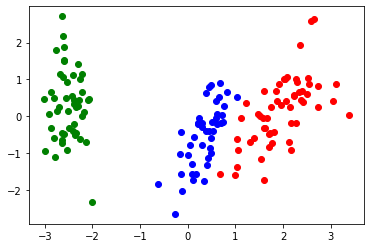

In [ ]:
gmm=GaussianMixture(n_components=3)
label=gmm.fit_predict(principalDf)
#print(label)

filtered_l0=principalComponents[label==0]
filtered_l1=principalComponents[label==1]
filtered_l2=principalComponents[label==2]

plt.scatter(filtered_l0[:,0],filtered_l0[:,1],color="red")
plt.scatter(filtered_l1[:,0],filtered_l1[:,1],color="green")
plt.scatter(filtered_l2[:,0],filtered_l2[:,1],color="blue")
plt.show()

In [ ]:
probs = gmm.predict_proba(principalDf)
props = probs[:20].round(3)
props

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])